In [5]:
import pandas as pd
import requests
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

# Getting FX Data

In [3]:
def _pull_data(ccy):
    print(ccy)
    # Making an API request to AlphaVantage for FX daily data
    response = requests.get(f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol={ccy}&outputsize=full&datatype=csv&apikey=YOUR_API_KEY')
    # Use StringIO to simulate a file for pandas read_csv
    df = pd.read_csv(StringIO(response.text))
    df['Date'] = pd.to_datetime(df['timestamp'])
    df['c'] = df['close'].astype(float)
    df['ccy'] = ccy
    df = df.sort_values('Date')
    df['LogReturn'] = df['c'].apply(lambda x: np.log(x)).diff()
    return df

def pull_data(ccy):
    if os.path.isfile(f"{ccy}.csv"):
        df = pd.read_csv(f"{ccy}.csv")
    else:
        df = _pull_data(ccy)
        df.to_csv(f"{ccy}.csv", index=False)
    return df

In [4]:
ccys = ["JPY", "CNH", "SGD", "THB", "HKD", "KRW", "TWD"]
results = pd.concat([pull_data(ccy) for ccy in ccys])

results = results.sort_values('Date')
results['LogReturn'] = results.groupby('ccy')['c'].transform(lambda x: np.log(x).diff())
results = results[results['Date'] >= pd.Timestamp("2014-11-24")]

JPY
CNH
SGD
THB
HKD
KRW
TWD


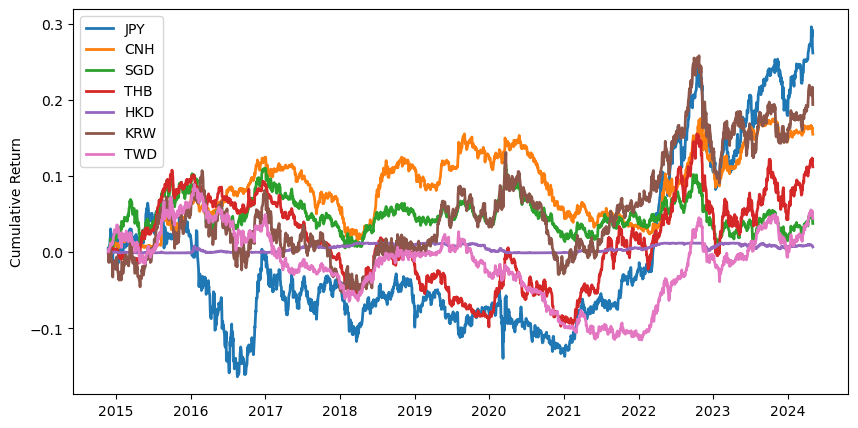

In [6]:
p = plt.figure(figsize=(10, 5))
ax = p.add_subplot(111)

ax.set_ylabel("Cumulative Return")

for ccy in ccys:
    # Filter the DataFrame for the currency
    filtered_data = results[results['ccy'] == ccy]
    # Calculate the cumulative sum of Log Returns
    cumulative_returns = filtered_data['LogReturn'].cumsum()
    # Plotting the cumulative returns for each currency
    ax.plot(filtered_data['Date'], cumulative_returns, label=ccy, linewidth=2)

ax.legend()
plt.show()